# Homework

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### EDA

* Load the data.
* Look at the median_house_value variable. Does it have a long tail?

In [2]:
df = pd.read_csv("~/housing_prices.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

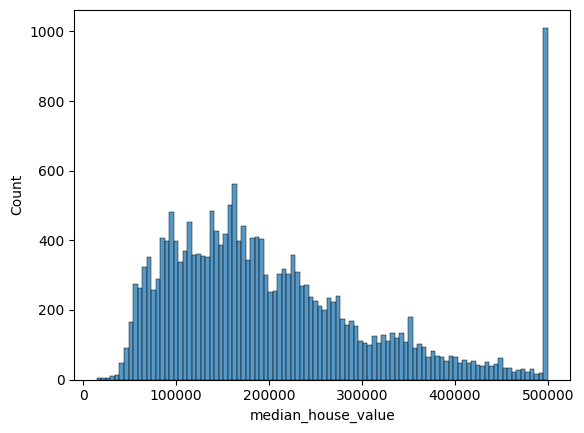

In [5]:
sns.histplot(df.median_house_value, bins=100)

### Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value'

Select only them.

In [6]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
          'households', 'median_income', 'median_house_value']

In [7]:
df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Question 1

Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [9]:
df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

### Question 2

What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188

In [10]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

#### Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [11]:
np.random.seed(42)

In [12]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [13]:
# shuffle index
index = np.arange(n)
np.random.shuffle(index)

# shuffle dataframe
df_shuffled = df.iloc[index]
df_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [14]:
# train, validate, test
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_train = df_shuffled.iloc[:n_train].copy()

In [15]:
# median house value
y_val_original = df_val.median_house_value.values
y_test_original = df_test.median_house_value.values
y_train_original = df_train.median_house_value.values

In [16]:
# log tranformation
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)

In [17]:
# Remove median house value
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [18]:
mean_total_bedrooms = df_train.total_bedrooms.mean()
mean_total_bedrooms

533.4803317730147

In [19]:
# imputation options
option1 = 0
option2 = mean_total_bedrooms

In [20]:
usecols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
          'households', 'median_income']

In [21]:
def prepare_X(df, fill):
    df_num = df[usecols]
    
    df_num = df_num.fillna(fill)
    X = df_num.values
    
    return X

In [22]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
def predict(w0, w, X):
    return w0 + X.dot(w)

In [25]:
# training
X_null_train = prepare_X(df_train, option1)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, option1)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [26]:
np.round(rmse(y_val, y_null_pred_val), 2)

0.33

In [27]:
# training
X_mean_train = prepare_X(df_train, option2)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, option2)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [28]:
np.round(rmse(y_val, y_mean_pred_val), 2)

0.33

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [29]:
def train_linear_regression_regularized(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [30]:
regs = np.array([0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10])

In [31]:
# regularization RMSE for different r values
for r in regs:
    w0, w = train_linear_regression_regularized(X_null_train, y_train, r)
    y_pred = predict(w0, w, X_null_train)
    y_val_pred = predict(w0, w, X_null_val)
    rmse_train = rmse(y_train, y_pred)
    rmse_val = rmse(y_val, y_val_pred)
    print(f'r = {r}, RMSE train = {round(rmse_train,2)}, RMSE val = {round(rmse_val, 2)}')

r = 0.0, RMSE train = 0.34, RMSE val = 0.33
r = 1e-06, RMSE train = 0.34, RMSE val = 0.33
r = 0.0001, RMSE train = 0.34, RMSE val = 0.33
r = 0.001, RMSE train = 0.34, RMSE val = 0.33
r = 0.01, RMSE train = 0.34, RMSE val = 0.33
r = 0.1, RMSE train = 0.34, RMSE val = 0.33
r = 1.0, RMSE train = 0.35, RMSE val = 0.33
r = 5.0, RMSE train = 0.35, RMSE val = 0.34
r = 10.0, RMSE train = 0.35, RMSE val = 0.34


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [32]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
scores = []

for seed in seeds:
    np.random.seed(seed)
    
    # shuffle index
    idx = np.arange(n)
    np.random.shuffle(idx)

    # shuffle dataframe
    df_shuffled = df.iloc[idx]

    # split
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled[n_train+n_val:].copy()

    # target
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # remove target field
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = predict(w0, w, X_val)

    error = rmse(y_val, y_pred)

    scores.append(error)

scores = np.array(scores)
std = np.std(scores)
print(scores)
print(f'RMSE std: {round(std, 3)}')

[0.33884305 0.33623873 0.33209123 0.34051536 0.33890241 0.34348667
 0.3451981  0.33959899 0.34662309 0.33659261]
RMSE std: 0.004


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245

In [34]:
np.random.seed(9)

# shuffle index
idx = np.arange(n)
np.random.shuffle(idx)

# shuffle dataframe
df_shuffled = df.iloc[idx]

# split
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

# target
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# remove target field
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# combine datasets
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

# train
X_full_train = prepare_X(df_full_train, 0)
w0, w = train_linear_regression_regularized(X_full_train, y_full_train, 0.001)

# predict
X_test = prepare_X(df_test, 0)
y_pred = predict(w0, w, X_test)

error = rmse(y_test, y_pred)

print(f'RMSE on full train dataset: {round(error, 2)}')

RMSE on full train dataset: 0.35
